# PENDAHULUAN

Studi kasus ini merupakan proyek akhir dari *Google Data Analytics Professional Certificate*. 

**Judul**   : Bellabeat Case Study

**Pemilik**  : Gian Habli Maulana

**Tanggal**  : 28 September 2022

## Bellabeat : Bagaimana perusahaan kesehatan bisa bermain dengan cerdas?

### Tahap 1 : Bertanya

#### 1.1 Latar Belakang

Bellabeat adalah sebuah perusahaan teknologi tinggi yang memproduksi produk pintar yang berfokus pada kesehatan. Sršen sebagai *founder* menggunakan latar belakangnya sebagai seniman untuk mengembangkan teknologi yang dirancang dengan indah yang menginformasikan dan menginspirasi wanita di seluruh dunia. Mengumpulkan data tentang aktivitas, tidur, stres, dan kesehatan reproduksi telah memungkinkan Bellabeat untuk memberdayakan wanita dengan pengetahuan tentang kesehatan dan kebiasaan mereka sendiri. Sejak didirikan pada tahun 2013, Bellabeat telah berkembang pesat dan dengan cepat memposisikan dirinya sebagai perusahaan kesehatan berbasis teknologi untuk wanita.


#### 1.2 Business Task

Menganalisis data dari penggunaan *FitBit Fitness Tracker* untuk memberikan wawasan bagaimana pelanggan menggunakan *FitBit App*. Kemudian, dengan menggunakan informasi ini, ia menginginkan rekomendasi tingkat tinggi tentang bagaimana tren ini dapat membantu penyusunan strategi pemasaran Bellabeat.

#### 1.3 Business Objectives :

1. Apa saja *trend* yang penggunaan *FitBit App* sudah terindentifikasi?
2. Bagaimana *trend* tersebut dapat diterapkan kepada pelanggan Bellabeat?
3. Bagaimana *trend* tresebut membantu strategi pemasaran dari Bellabeat?

#### 1.4 Dokumen yang disajikan:

1. Ringkasan dari *business task*
2. Deskripsi mengenai sumber data yang digunakan
3. Dokumentasi dari proses *cleaning and manipulating data*
4. Ringkasan analisis
5. Visualisasi data
6. Rekomendasi konten tingkat tinggi berdasarkan hasil analisis

#### 1.5 Pemangku Kepentingan

1. Urska Srsen: Salah satu pendiri Bellabeat dan *Chief Creative Officer*
2. Sando Mur: Matematikawan dan salah satu pendiri Bellabeat; anggota kunci dari tim eksekutif Bellabeat
3. Tim analisis pemasaran Bellabeat: Sebuah tim analis data yang bertanggung jawab untuk mengumpulkan, menganalisis, dan melaporkan data yang dapat membantu penyusunan strategi pemasaran Bellabeat. 

### Tahap 2 : Mempersiapkan

#### 2.1 Sumber Data

1. Data tersedia secara publik pada *website*: https://www.kaggle.com/arashnic/fitbit 
2. Data diambil dari responden hasil survey  *Amazon Mechanical Turk* antara 12 Maret 2016 sampai 12 Mei 2016.
3. Data diambil dari 30 orang pengguna FitBit yang telah memberikan izin untuk membagikan data pelacak pribadi milik mereka.
4. Data yang diambil meliputi:(1) *physical activity recorded in minutes*, (2) *heart rate*, (3) *sleep monitoring*, (4) *daily activity*, dan (5) *steps*.


#### 2.2 Batasan Data

1. Data dikumpulkan dari tahun 2016.
2. Sampel berukuran 30 wanita penggunan FitBit App tidak merepresetasikan keseluruhan dari wanita.
3. Data dikumpulkan melalui survey sehingga tidak menjamin integritas dan akurasi data.

#### 2.3 Apakah data ini memenuhi ROCCC?

Sumber data yang baik memenuhi standar *Reliable, Original, Comprehensive, Current,* dan *Cited*.

1. *Reliable* - Kurang Baik - data hanya diambil dari 30 orang responden.
2. *Original* - Kurang Baik - data diambil dari pihak ketiga (*Amazon Mechanical Turk*).
3. *Comprehensive* - Baik - data terdiri dar 5 parameter yang ada dalam FitBit App.
4. *Current* - Kurang Baik - data ini diambil 6 tahun lalu, sehingga kurang relevan dengan tahun sekarang.
5. *Cited* - Kurang Baik - data diambil dari pihak ketiga (*Amazon Mechanical Turk*).

Secara keseluruhan data kurang baik dan tidak sarankan untuk  membuat rekomendasi bisnis menggunakan data tersebut.

#### 2.4 Data yang akan digunakan

dailyActivity_merged.csv

### Tahap 3:Memproses

Pada tahap 3 ini Python digunakan untuk memproses data.

#### 3.1 *Import Library* yang akan digunakan

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 
import datetime as dt 

#### 3.2 *Import* dataset yang akan digunakan

In [29]:
daily_activity = pd.read_csv('dailyActivity_merged.csv')

daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


#### 3.3 *Data Cleaning*

##### 1. Memeriksa tipe data apakah sesuai dengan *value* yang ditampilkan

In [30]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

Tipe data untuk *ActivityDate* berupa 'object' seharusnya 'datetime64'. Melakukan proses konversi tipe data.


In [31]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")

##### 2. Memeriksa apakah ada *missing values* (NaN) dan melakukan tindakan pada data tersebut.

In [32]:
daily_activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

Tidak ada *missing values* (NaN) pada dataset.

##### 3. Memeriksa apakah ada baris yang duplikat dan menghapus data tersebut apabila ditemukan.

In [33]:
daily_activity.duplicated().sum()

0

Tidak ada data duplikat pada dataset.

##### 4. Memeriksa rangkuman data statistik deskriptif keseluruhan data

In [34]:
daily_activity.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,940.0,4.855407e+09,2.424805e+09,1.503960e+09,2.320127e+09,4.445115e+09,6.962181e+09,8.877689e+09
TotalSteps,940.0,7.637911e+03,5.087151e+03,0.000000e+00,3.789750e+03,7.405500e+03,1.072700e+04,3.601900e+04
TotalDistance,940.0,5.489702e+00,3.924606e+00,0.000000e+00,2.620000e+00,5.245000e+00,7.712500e+00,2.803000e+01
TrackerDistance,940.0,5.475351e+00,3.907276e+00,0.000000e+00,2.620000e+00,5.245000e+00,7.710000e+00,2.803000e+01
LoggedActivitiesDistance,940.0,1.081709e-01,6.198965e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.942142e+00
VeryActiveDistance,940.0,1.502681e+00,2.658941e+00,0.000000e+00,0.000000e+00,2.100000e-01,2.052500e+00,2.192000e+01
ModeratelyActiveDistance,940.0,5.675426e-01,8.835803e-01,0.000000e+00,0.000000e+00,2.400000e-01,8.000000e-01,6.480000e+00
LightActiveDistance,940.0,3.340819e+00,2.040655e+00,0.000000e+00,1.945000e+00,3.365000e+00,4.782500e+00,1.071000e+01
SedentaryActiveDistance,940.0,1.606383e-03,7.346176e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e-01
VeryActiveMinutes,940.0,2.116489e+01,3.284480e+01,0.000000e+00,0.000000e+00,4.000000e+00,3.200000e+01,2.100000e+02


Nilai mean dan median pada semua data memiliki nilai yang mendekati, artinya sebaran data cukup baik.

#### 3.4 Data Manipulation

##### 1. Membuat kolom baru *DayOfTheWeek* dengan memisahkan *ActivityDate* menjadi hari untuk analisis selanjutnya.

In [35]:
daily_activity["DayOfTheWeek"] = daily_activity.ActivityDate.dt.day_name()

daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


##### 2. Membuat kolom baru total_mins dengan menjumlahkan 'VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes' menjadi total menit untuk analisis selanjutnya.

In [36]:
daily_activity["total_mins"] = daily_activity.VeryActiveMinutes + daily_activity.FairlyActiveMinutes + daily_activity.LightlyActiveMinutes + daily_activity.SedentaryMinutes
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek,total_mins
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1094
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,1033
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,1440
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,998
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,1040


##### 3. Membuat kolom baru *total_hours* dengan mengkonversi *total_mins* ke dalam satuan jam untuk analisis selanjutnya.

In [37]:
daily_activity["total_hours"] = round(daily_activity.total_mins / 60)

daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfTheWeek,total_mins,total_hours
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1094,18.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,1033,17.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,1440,24.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,998,17.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,1040,17.0


### Tahap 4: Menganalisis

Melakukan analisis berdasarkan statistika deskriptif dari data.

In [38]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,total_mins,total_hours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000


Interpretasi dari data statistika deskriptif di atas adalah sebagai berikut:

1. Secara rata-rata pelanggan menempuh 7.638 langkah. Jumlah ini tidak sesuai dengan rekomendasi *Centers for Disease Control and Prevention (CDC)* yaitu 10.000 langkah.

2. Secara rata-rata kalori yang terbakar 2.303 kalori. Namun, tidak dapat merincikan faktor yang berpengaruh terhadap pembakaran kalori seperti usia, berat badan, aktivitas harian, hormon, dan asupan kalori.

### Tahap 5 : Berbagi

#### 5.1 *Import Library* untuk visualisasi

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

##### 5.2 Visualisasi Frekuensi Jumlah Pelanggan Masuk ke Aplikasi

C:\Users\Gian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


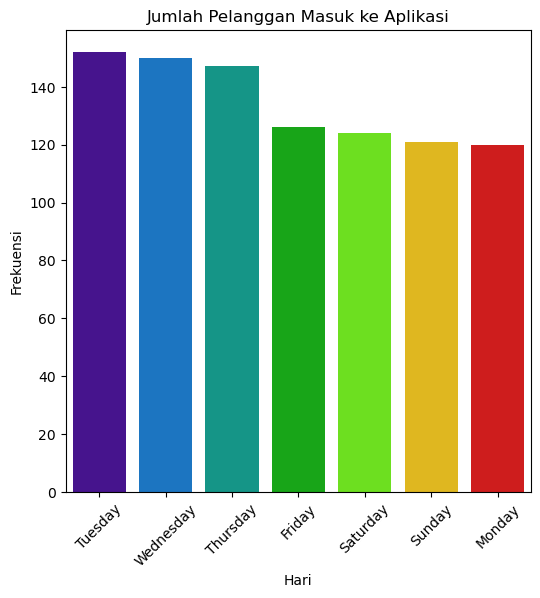

In [40]:
plt.style.use("default")
plt.figure(figsize=(6,6)) 
sns.countplot(daily_activity.DayOfTheWeek,palette='nipy_spectral')

plt.xlabel("Hari")
plt.ylabel("Frekuensi")
plt.title("Jumlah Pelanggan Masuk ke Aplikasi")
plt.xticks(rotation = 45)
plt.show()

Berdasarkan grafik diatas dapat dapat diambil kesimpulan:
1. Penggunaan FitBit app paling banyak dilakukan tengah pekan (Selasa, Rabu, dan Kamis)
2. Pada hari jum'at pengunaan menurun, karena memasuki akhir pekan dimana aktivitas pelanggan menurun.

#### 5.3 Visualisai Kalori Terbakar Setiap Langkah yang Dilakukan

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


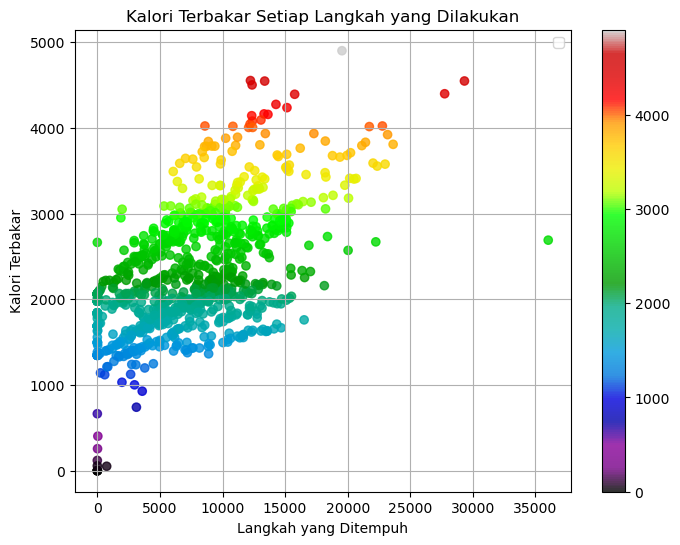

In [41]:
plt.style.use("default")
plt.figure(figsize=(8,6)) 
plt.scatter(daily_activity.TotalSteps, daily_activity.Calories, 
            alpha = 0.8, c = daily_activity.Calories, 
            cmap = "nipy_spectral")

median_calories = 2134
median_steps = 7405.5

plt.colorbar(orientation = "vertical")
plt.xlabel("Langkah yang Ditempuh")
plt.ylabel("Kalori Terbakar")
plt.title("Kalori Terbakar Setiap Langkah yang Dilakukan")
plt.grid(True)
plt.legend()
plt.show()

Berdasarkan grafik di atas, dapat disimpulkan bahwa:
1. Korelasi antara kalori yang terbakar dengan jumlah langkah yang ditempuh bernilai positif.
2. Intensitas kalori yang terbakar meningkat pada rentang 0 sampai 15.000 langkah yang ditempuh, kemudian intensitas itu menurun saat langkah yang ditempuh lebih dari 15.000 langkah.
3. Terdapat *outliers* pada koordinat 0,0

#### 5.4 Visualisai Kalori Terbakar Untuk Setiap Jam Pelanggan Masuk Ke Aplikasi

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


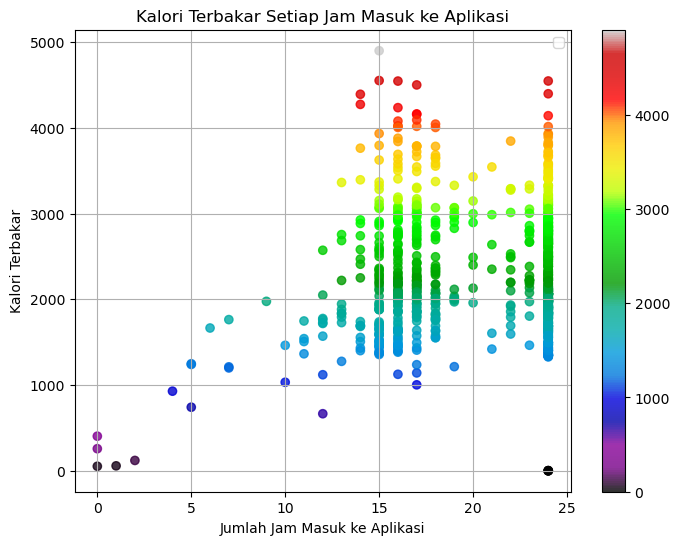

In [42]:
plt.style.use("default")
plt.figure(figsize=(8,6)) 
plt.scatter(daily_activity.total_hours, daily_activity.Calories, 
            alpha = 0.8, c = daily_activity.Calories, 
            cmap = "nipy_spectral")

median_calories = 2134
median_hours = 24
median_sedentary = 1057.5 / 60

plt.colorbar(orientation = "vertical")
plt.xlabel("Jumlah Jam Masuk ke Aplikasi")
plt.ylabel("Kalori Terbakar")
plt.title("Kalori Terbakar Setiap Jam Masuk ke Aplikasi")
plt.legend()
plt.grid(True)
plt.show()

Berdasarkan grafik di atas dapat disimpulkan bahwa:
1. Kalori terbakar memiliki korelasi yang lemah pada jumlah jam masuk ke aplikasi.
2. Terdapat *outliers* pada koordinat 0,0

#### 5.5 Presentasi Aktivitas dalam Menit

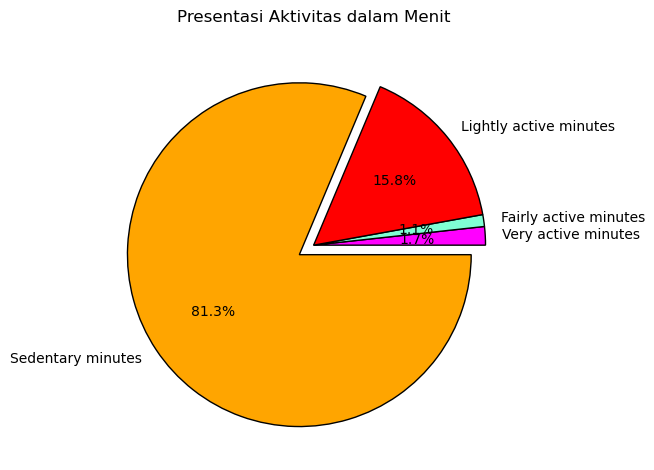

In [43]:
very_active_mins = daily_activity.VeryActiveMinutes.sum()
fairly_active_mins = daily_activity.FairlyActiveMinutes.sum()
lightly_active_mins = daily_activity.LightlyActiveMinutes.sum()
sedentary_mins = daily_activity.SedentaryMinutes.sum()

slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["magenta", "aquamarine", "red", "orange"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Presentasi Aktivitas dalam Menit")
plt.tight_layout()
plt.show()


Berdasarkan grfaik diatas dapat disimpulkan bahwa:
1. Waktu tetap (*Sedentary minutes*) memiliki persetasi paling besar yaitu 81,3%
2. Penggunaan FitBit App diindikasikan paling banyak oleh aktivitas harian jika dilihat pada porsi watu tetap yang mendominasi.
3. FitBit App diindikasikan jarang digunakan untuk aktivitas berlari, jika di lihat pada Waktu Sangat Aktif (*very active minutes*) porsinya sangat kecil hanya 1,7%

### Tahap 6: Bertindak

Pada tahap terakhir ini, kita akan memberikan rekomendasi terbaik berdasarkan hasil analisis yang telah dilakukan.





**1. Apa saja trend yang penggunaan FitBit App sudah terindentifikasi?**

Mayoritas FitBit App digunakan untuk memantau aktivitas harian, bukan untuk memantau pola hidup sehat pelanggan.


Pengguna FitBit App mayoritas pada tengah pekan pada hari selasa, rabu, dan kamis. Hal ini selaras dengan kebiasan pelanggan untuk emnggunakan aplikasi ini untuk memantau aktivitas harian, dimana pada hari tersebut adalah hari padat untuk bekerja.

**2. Bagaimana trend tersebut dapat diterapkan kepada pelanggan Bellabeat?**


Bellabeat berfokus untuk membangun produk yang  menginformasikan dan menginspirasi wanita tentang kesehatan, kebiasaan, dan mendorong wanita untuk hidup sehat. Tren pada pertanyaan 1 berfokus pada kesehatan dan pola hidup, sehingga dapat diaplikasikan pada pelanggan Bellabeat.

**3. Bagaimana *trend* tresebut membantu strategi pemasaran dari Bellabeat?**

Tim pemasaran Bellabeat dapat meengedukasi pelanggan seputar keuntungan dari akvititas *fitness*, jenis akvititas *fitness* yang dapat dilakukan, dan jumlah kalori terbakar yang dapat diinformasikan oleh Bellabeat APP

pada akhir pekan, Bellabeat App dapat membuat sebuah pemberitahuan untuk mendorong pelanggan tetap melakukan *exercise* untuk menjaga kebugaran.